# Predicting Life expectancy using Linear Regression

## Executive Summary

In the following assignment, I have used the different regression models discussed in the class to predict the life expectancy. Mean squared error and R-Squared value are consider as desirable evaluation metric in this study.Since the varince in data is different in variabe to variable , considering R-Squared value will be valuable. R-Squared value is compared in each model for train and testing data (the given 'train.csv' is splited into train and test).In search of best model to predict the target, simple linear regression model(OLS) is performed intially and further the regression model is tuned with standardised,normalised data and polynomial features.


   Regularisation is carried out to deal with overfitting of the polynomial regression model of degree 2. Lasso and Ridge regression is carried out and Ridge model is selected over Lasso because the in cross validation the ideal aplha value is zero which is nothing but a Ordinary Least Square model. The final selected model is polynomial degree 2 with a regularization parameter,alpha a.k.a lamba value of 0.02726 which gives a MSE of 12.8 and R-Squared value of 0.864 for training and 0.854 for testing data.


### Note : 

According to the specifications provided in the assesment, data preprocessing not carried out. The main idea to avoid data preprocessing is to test the perfomance machine learning model i.e,  can model avoid the data reducancies and outlier , learning curve of the ML model  

In [288]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import preprocessing
import os

### Chossing the working directory

In [289]:
os.chdir('D:\CML\Assignment 1\dataset')

### Importing the data set from the above mentioned folder

In [290]:
#importing 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Data Analysis

A basic exploratory analysis is performed before the modelling. During this stage, summary of
Statistics clearly exhibits the nature of high variance in many variables. Categorical variables
like Country, status are labelled as integer objects. The main disadvantage is that a simple linear
regression algorithm considers these variables as magnitude and the weights are considered
according to the distribution of these variables rather than the nature of the variable.Thus adding
more redundancy to the linear model.


In [291]:
train.head(5)

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [292]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
ID                              2071 non-null int64
TARGET_LifeExpectancy           2071 non-null float64
Country                         2071 non-null int64
Year                            2071 non-null int64
Status                          2071 non-null int64
AdultMortality                  2071 non-null int64
AdultMortality-Male             2071 non-null int64
AdultMortality-Female           2071 non-null int64
InfantDeaths                    2071 non-null int64
Alcohol                         2071 non-null float64
PercentageExpenditure           2071 non-null float64
Measles                         2071 non-null int64
BMI                             2071 non-null float64
UnderFiveDeaths                 2071 non-null int64
Polio                           2071 non-null int64
TotalExpenditure                2071 non-null float64
Diphtheria                      2071 non-null float

### Summary of Statistics

In [293]:
train.describe(include='all')

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


In [294]:
train.Country.value_counts()

187    16
144    16
100    16
102    16
106    16
108    16
112    16
114    16
122    16
124    16
128    16
132    16
134    16
136    16
138    16
140    16
146    16
96     16
148    16
150    16
154    16
156    16
158    16
160    16
162    16
164    16
168    16
170    16
174    16
176    16
       ..
13     16
15     16
19     16
21     16
23     16
25     16
27     16
31     16
33     16
37     16
39     16
47     16
57     16
71     16
69     16
67     16
65     16
61     16
59     16
55     16
53     16
51     16
0      16
73      1
29      1
152     1
173     1
119     1
85      1
92      1
Name: Country, Length: 136, dtype: int64

#### Droping the ID column

In [295]:
#train without ID column
train_1 = train.drop('ID',axis=1)

### Visualising the distribution the data

<Figure size 432x288 with 0 Axes>

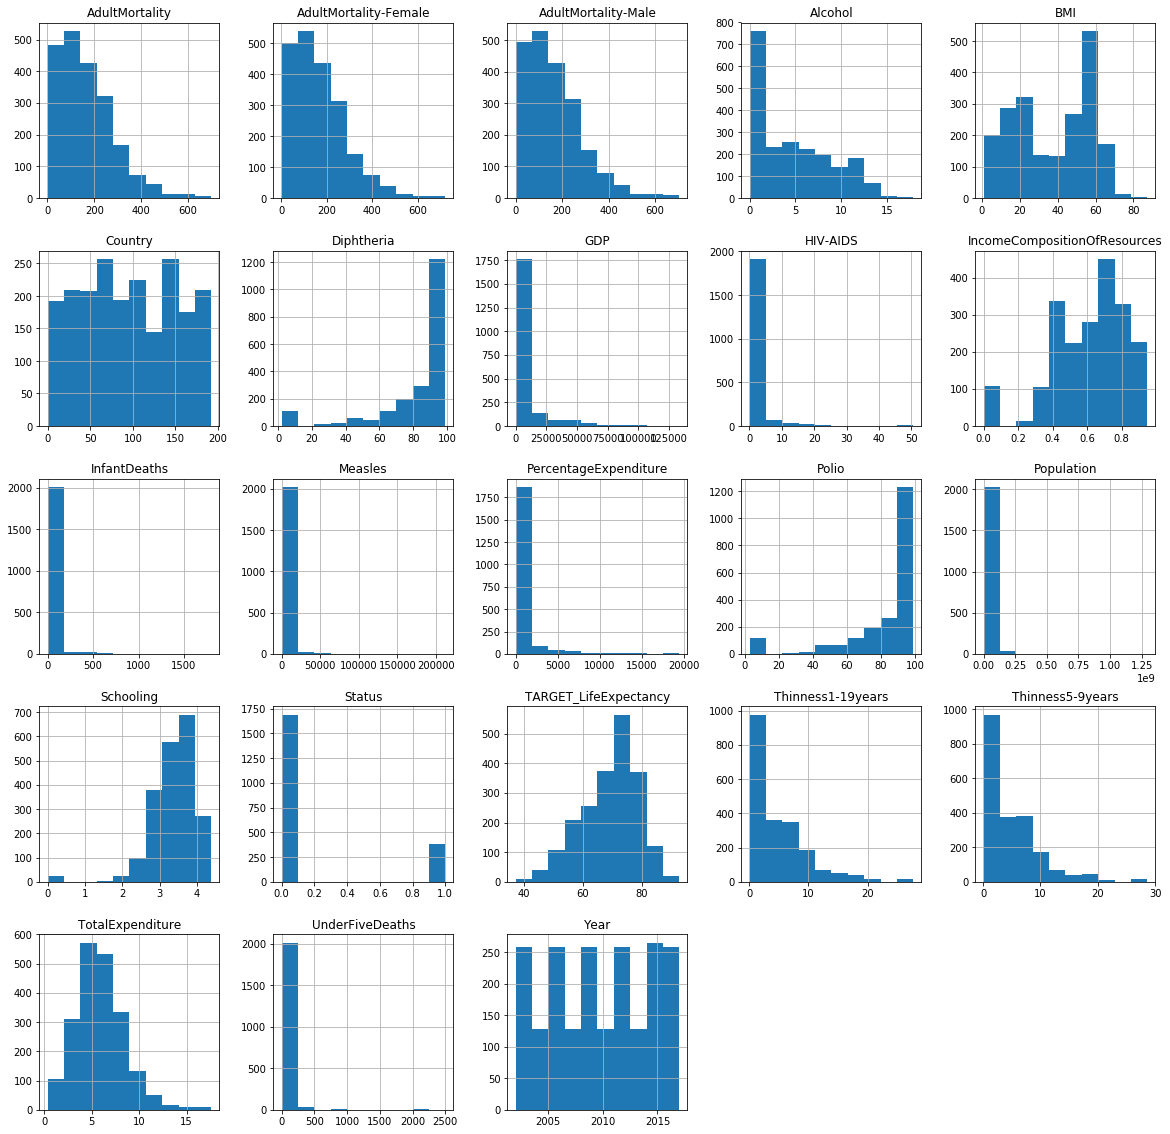

In [296]:
plt.figure()
train_1.hist(figsize=(20,20))
plt.show()

### Correlation Matrix

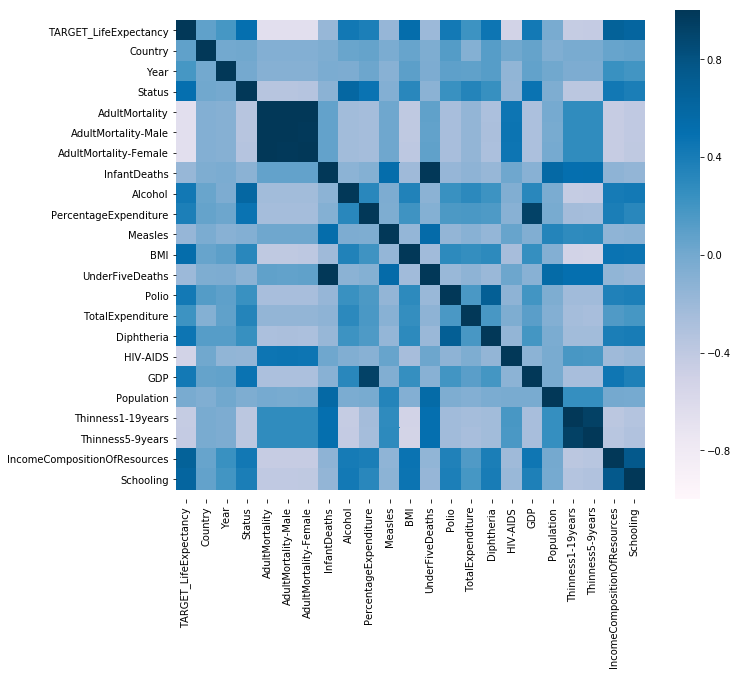

In [297]:
import seaborn as sns
correlations = train_1.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap="PuBu", center=0, vmin=-1, vmax=1, square=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Spliting the data 

In [298]:
# Split the target variable
x= train_1.drop('TARGET_LifeExpectancy',axis=1)
y= train_1.TARGET_LifeExpectancy

In [299]:
# Split the train data set to validte and test the hypothesis 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=9)

In [300]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1656, 22)
(415, 22)
(1656,)
(415,)


##### Modeling Linear Regression without normalization

In [301]:
from sklearn import linear_model
linReg = linear_model.LinearRegression()

In [302]:
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [303]:
#plot the intercepts???
print(linReg.intercept_)
print(linReg.coef_)

-33.74972052107813
[ 1.45685570e-03  4.37631864e-02  2.32109788e+00 -6.60590323e-03
 -2.69132652e-03 -1.05204799e-02  1.00360420e-01  1.93787543e-01
 -5.21062846e-05 -3.58341435e-06  2.69736068e-02 -7.37757402e-02
  1.94133629e-02 -5.31501614e-05  3.14633487e-02 -4.95287895e-01
  4.81993924e-05 -2.58845728e-09 -7.00988572e-02 -5.05099102e-02
  6.24920539e+00  2.67751711e+00]


### Predicition

In [304]:
predYRm = linReg.predict(x_test)

In [305]:
from sklearn.metrics import mean_squared_error
print('Mean squared error ', mean_squared_error(y_test,predYRm ))
#train score
print('Training Score:', linReg.score(x_train,y_train))
#test score
print('Test score:',linReg.score(x_test,y_test))
#print('Accurcy',linReg.score(x_test,y_test))

Mean squared error  24.18524328056334
Training Score: 0.7636398032763905
Test score: 0.731587016773813


In [306]:
#print(np.array(list(zip(y_test.values, predYRm))))

### Linear Regression with data Standaradisation

In [307]:
stand_xtrain = x_train.copy()
stand_xtrain = (stand_xtrain - stand_xtrain.mean()).values/ stand_xtrain.std().values
stand_xtest = x_test.copy()
stand_xtest = (stand_xtest - stand_xtest.mean()).values/ stand_xtest.std().values
stand_ytrain = y_train.copy()
stand_ytrain = (stand_ytrain - stand_ytrain.mean())/ stand_ytrain.std()
stand_ytest = y_test.copy()
stand_ytest = (stand_ytest - stand_ytest.mean())/ stand_ytest.std()


In [308]:
linRegStd = linear_model.LinearRegression(normalize= False)
linRegStd.fit(stand_xtrain, stand_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [309]:
#plot the intercepts???
print(linRegStd.intercept_)
print(linRegStd.coef_)

2.746841429481486e-15
[ 8.48782681e-03  2.12536596e-02  9.65086676e-02 -8.24675907e-02
 -3.37760002e-02 -1.31136943e-01  1.41124110e+00  8.64478092e-02
 -1.19940863e-02 -3.81002126e-03  5.69288130e-02 -1.42494811e+00
  4.77973538e-02 -1.43080930e-05  7.68568300e-02 -2.50615686e-01
  8.06584502e-02 -1.90763676e-02 -3.42048222e-02 -2.50110910e-02
  1.43410229e-01  1.63532922e-01]


In [310]:
predYLinRegStd = linRegStd.predict(stand_xtest)
# print(list(zip(predYRm, (predYLinRegNorm * y_test.std() ) + y_test.mean(), y_test)))

from sklearn.metrics import mean_squared_error
print('Mean squared error ', mean_squared_error(y_test,(predYLinRegNorm * y_test.std() ) + y_test.mean()))

print('Training Score:', linRegStd.score(stand_xtrain,stand_ytrain))
#test score
print('Test score:',linRegStd.score(stand_xtest,stand_ytest))

Mean squared error  434306.99723707396
Training Score: 0.7636398032763906
Test score: 0.735575527091903


### Linear Regression with Normalisation

In [311]:
namesX=x_train.columns
#namesY=y_train.columns
namesXT=x_test.columns
#namesYT=y_test.columns
norm_scaler=preprocessing.MinMaxScaler()

scaledX_fit=norm_scaler.fit(x_train.values.reshape(-1,1))
scaledY_fit=norm_scaler.fit(y_train.values.reshape(-1,1))
scaledXT_fit=norm_scaler.fit(x_test)
scaledYT_fit=norm_scaler.fit(y_test.values.reshape(-1,1))

scaledX_df=scaledX_fit.transform(x_train)
scaledY_df=scaledY_fit.transform(y_train.values.reshape(-1,1))
scaledXT_df=scaledXT_fit.transform(x_test)
scaledYT_df=scaledYT_fit.transform(y_test.values.reshape(-1,1))

x_train_norm = pd.DataFrame(scaledX_df, columns=namesX)
y_train_norm = pd.DataFrame(scaledY_df)
x_test_norm = pd.DataFrame(scaledXT_df, columns=namesXT)
y_test_norm = pd.DataFrame(scaledYT_df)

#print(x_train_Standaradised)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [312]:
#y_train_df= pd.DataFrame(y_train)
#print(y_train_df)
#namesY=y_train_df.columns
#scaledY_df=preprocessing.StandardScaler().fit_transform(y_train_df)
#y_train_Standaradised = pd.DataFrame(scaledY_df,columns=namesY)
#print(y_train_Standaradised)

In [313]:
linRegNorm = linear_model.LinearRegression(normalize=True)
linRegNorm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [314]:
predYLinRegNorm = linRegNorm.predict(x_test)
#print(predYLinRegStd)
from sklearn.metrics import mean_squared_error
print('Mean squared error ', mean_squared_error(y_test,predYLinRegNorm))

print('Training Score:', linRegNorm.score(x_train,y_train))
#test score
print('Test score:',linRegNorm.score(x_test,y_test))

Mean squared error  24.18524328040661
Training Score: 0.7636398032763906
Test score: 0.7315870167755525


Normalisation and standardisation is performed on the data while modelling, the results
of the model are barely the same as the OLS scores. Correlation matrix gives an evidence of
dependencies of the target variable on different variables. As known,using all the feature space is
not an ideal way to develop a model and deploy it on the real world dataset.Hence, polynomial
features are used for further more understanding of the dependencies in the feature space.

## Polynomial Regression

Polynomial features with different degrees ranging from degree 2 to degree 6 have been
performed. The main intuition in this stage is that as the complexity of the polynomial function
increases, MSE and R are getting better, that makes the model overfit. With reference to 2

Occam's Razor rule : “ simpler models are better”, model investigation proceeds with polynomial
features of degree 2. 

In [315]:
# if you increase number of features, we need more training samples.
# if increase degree more than 6 for a better R^2 and MSE, the time complexity increase abruptly, that make the model overfit. 
# occam's razor rule - simpler models are better. 
#  if we consider polynomial model of degree 2 , it barely exaplin the varince in test data. So further penality might
#improve the model.
from sklearn.preprocessing import PolynomialFeatures
for deg in range(2, 7):
    polyFeat_2 = PolynomialFeatures(degree=deg, include_bias=True)
    polyTrainX = polyFeat_2.fit_transform(x_train)
    polyTestX = polyFeat_2.fit_transform(x_test)
    linReg.fit(polyTrainX,y_train)

    predYRmPoly2 = linReg.predict(polyTestX)

    from sklearn.metrics import mean_squared_error
    print("Deg:", deg,'MSE: ', mean_squared_error(y_test,predYRmPoly2))
    print( "Train score:  ",linReg.score(polyTrainX,y_train))
    print('Test Score:  ',linReg.score(polyTestX,y_test))
    

Deg: 2 MSE:  50.232606302307545
Train score:   0.820196354878651
Test Score:   0.44250783188669784
Deg: 3 MSE:  1221.274199169658
Train score:   -0.19336392064877717
Test Score:   -12.5539612867878
Deg: 4 MSE:  207.81955964257773
Train score:   0.08009920228121226
Test Score:   -1.3064257543047328
Deg: 5 MSE:  144.95378015779377
Train score:   0.038263760605225294
Test Score:   -0.6087279383844193
Deg: 6 MSE:  91.83981024285679
Train score:   0.025481654482637173
Test Score:   -0.019257782948293833


## Regularisation Parameter Selection

K-Fold Cross-Validation is used with five folds to validate and select the regularization
parameter , alpha a.k.a lambda , for both ridge and lasso regression. The selection criteria follows
as such the alpha is selected at first least value of average MSE value from all cross validation
folds. 


In [316]:
# Since there are barely 1600 rows available in training dataset, I consider 5 splits for cross-validation.
#Source: Lab week 5
from sklearn import model_selection
number_splits = 5
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

In [317]:
# Secting the parameters from 0.001 to 0.5 splitted into 20 parts
alphas = np.linspace(0.001,.5,num=20)
alphas

array([0.001     , 0.02726316, 0.05352632, 0.07978947, 0.10605263,
       0.13231579, 0.15857895, 0.18484211, 0.21110526, 0.23736842,
       0.26363158, 0.28989474, 0.31615789, 0.34242105, 0.36868421,
       0.39494737, 0.42121053, 0.44747368, 0.47373684, 0.5       ])

### Simple Linear regression

For linear regression, the alpha value is selected to be 0.001. Both Lasso and Ridge
regression yield the same results and the features are selected the same as selected in linear
regression. The main reason behind this is as discussed earlier about categorical variables(can be
evident from the ‘features selection’ plot), weights of redundant features. 

Text(0, 0.5, 'Average MSE')

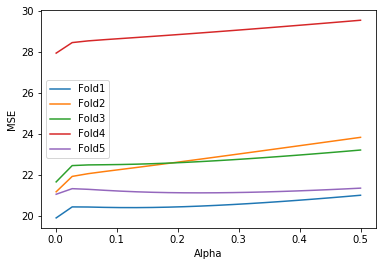

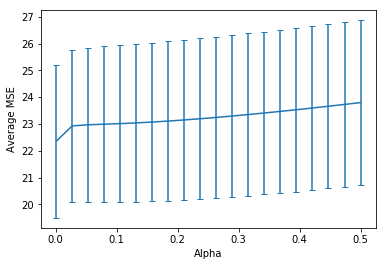

In [318]:

#for best parameter we get 0.001
linReg = linear_model.LinearRegression()
from sklearn import model_selection
number_splits = 5
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True,random_state=999)

lRegPara = np.linspace(0.001,.5,num=20)
# lRegPara =  [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(x):
    # Get the training and validation data
    x_train = np.array(x.loc[trainIndex])
    y_train = np.array(y.loc[trainIndex])
    x_valid = np.array(x.loc[validIndex])
    y_valid = np.array(y.loc[validIndex])
   
    for j , regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(x_train, y_train)
        predY = polyRidgeReg.predict(x_valid)
        mse = mean_squared_error(y_valid, predY)
        lResults[nsplit, j] = (mse)
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold'+str(nsplit+1))
    nsplit = nsplit + 1

plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")

#lResults.min()
#np.mean(lResults,axis=0).min()


### Linear Regression with Ridge

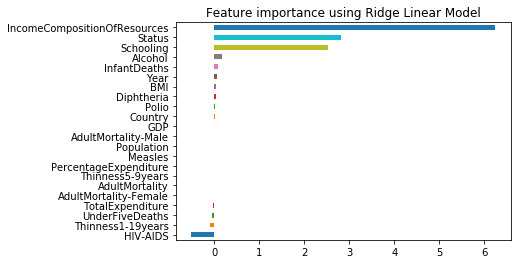

MSE :  23.756378873828844
Train Score: 0.7600155294868731
Test Score: 0.7363466453405286


In [319]:
 RidgeReg = linear_model.Ridge(alpha=0.001, normalize=True)
RidgeReg.fit(x_train, y_train)
predYRidge = RidgeReg.predict(x_test)
ridgeMSE = mean_squared_error(y_test, predYRidge)
coef = pd.Series(np.squeeze(RidgeReg.coef_), index = x.columns)
imp_coef = coef.sort_values()
f10=plt.figure()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Linear Model")
plt.show()
print("MSE : ", ridgeMSE)
print("Train Score:",RidgeReg.score(x_train,y_train))
print("Test Score:",RidgeReg.score(x_test,y_test))
f10.savefig("RidgeCV1.png", bbox_inches='tight', dpi=600)


Text(0, 0.5, 'Average MSE')

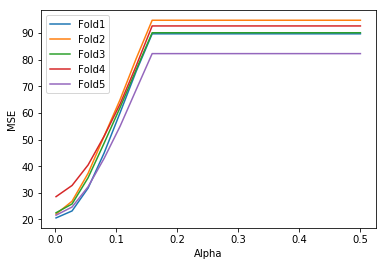

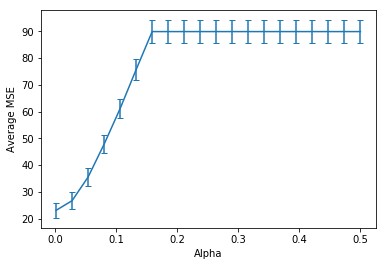

In [320]:
# Lasso for Simple Linear regression

from sklearn import model_selection
number_splits = 5
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True,random_state=999)

lRegPara = np.linspace(0.001,.5,num=20)
# lRegPara =  [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(x):
    # Get the training and validation data
    x_train = np.array(x.loc[trainIndex])
    y_train = np.array(y.loc[trainIndex])
    x_valid = np.array(x.loc[validIndex])
    y_valid = np.array(y.loc[validIndex])
   
    for j , regPara in enumerate(lRegPara):
        LinearLassoReg = linear_model.Lasso(alpha=regPara, normalize=True)
        LinearLassoReg.fit(x_train, y_train)
        predY = LinearLassoReg.predict(x_valid)
        mse = mean_squared_error(y_valid, predY)
        lResults[nsplit, j] = (mse)
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold'+str(nsplit+1))
    nsplit = nsplit + 1

plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")

#lResults.min()
#np.mean(lResults,axis=0).min()


### Linear Regression with Lasso

MSE :  23.756378873828844


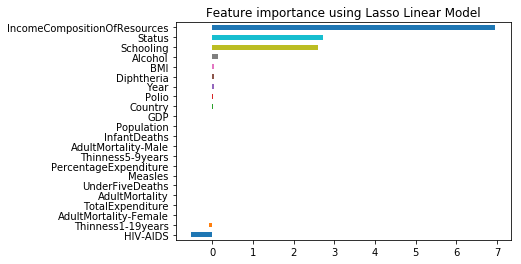

Train Score: 0.7511330315863692
Test Score: 0.7251188388765335


In [321]:
lassoReg = linear_model.Lasso(alpha=0.001, normalize=True)
lassoReg.fit(x_train, y_train)
predYRidge = lassoReg.predict(x_test)
lassoMSE = mean_squared_error(y_test, predYRidge)
print("MSE : ", ridgeMSE)
coef = pd.Series(np.squeeze(lassoReg.coef_), index = x.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Linear Model")
plt.show()
print("Train Score:",lassoReg.score(x_train,y_train))
print("Test Score:",lassoReg.score(x_test,y_test))

## Polynomial Regression

For polynomial features, interestingly the variation of both train dataset and test dataset is
explained with R value of 0.88 and 0.874 respectively by Ridge regression with alpha 2
0.027(fig1.2). On the other hand, Lasso regression cross-validation plot gives the minimum alpha
value of 0 (fig1.3) which brings us back to OLS.

The main reason Ridge regression performs well on polynomial regression is because the
penalty term is the squared magnitude to the loss function. Thus it avoids the over fit of the
model with an optimum alpha value. 

### Polynomial Features with Ridge Regression

14.132613510488103

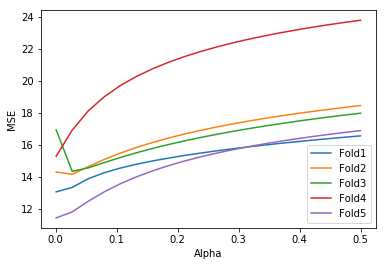

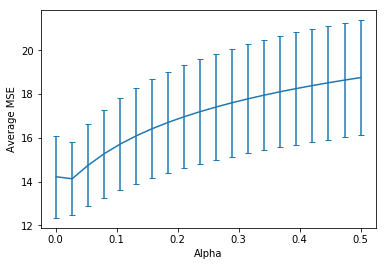

In [322]:
#Polynomial
# Using a plot to get the lambda parameter by ploting the average value of MSE vs alpha values.
#Criteria: select the aplha when first ocuurence of least MSE
# first defining the polynomial model selected
polyFeat_d2 = PolynomialFeatures(degree=2, include_bias=True)

from sklearn import model_selection
number_splits = 5
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True,random_state=999)

lRegPara = np.linspace(0.001,.5,num=20)
# lRegPara =  [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
f=plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(x):
    # Get the training and validation data
    x_train = np.array(x.loc[trainIndex])
    y_train = np.array(y.loc[trainIndex])
    x_valid = np.array(x.loc[validIndex])
    y_valid = np.array(y.loc[validIndex])
    # This is where you're polynomial model is used!
    polyFitTrainX = polyFeat_d2.fit_transform(x_train)
    polyFitValidX = polyFeat_d2.fit_transform(x_valid)
    for j , regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, y_train)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(y_valid, predY)
        lResults[nsplit, j] = (mse)
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold'+str(nsplit+1))
    nsplit = nsplit + 1

plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

f1=plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")
f1.savefig("RidgeCV1.png", bbox_inches='tight', dpi=600)
lResults.min()
np.mean(lResults,axis=0).min()


In [323]:
print(np.array(list(zip(lRegPara, np.mean(lResults,axis=0)))))
#print(lRegPara, np.mean(lResults,axis=0))

[[1.00000000e-03 1.42226783e+01]
 [2.72631579e-02 1.41326135e+01]
 [5.35263158e-02 1.47521239e+01]
 [7.97894737e-02 1.52772084e+01]
 [1.06052632e-01 1.57176038e+01]
 [1.32315789e-01 1.60936846e+01]
 [1.58578947e-01 1.64207223e+01]
 [1.84842105e-01 1.67094618e+01]
 [2.11105263e-01 1.69675571e+01]
 [2.37368421e-01 1.72006007e+01]
 [2.63631579e-01 1.74127875e+01]
 [2.89894737e-01 1.76073409e+01]
 [3.16157895e-01 1.77867904e+01]
 [3.42421053e-01 1.79531587e+01]
 [3.68684211e-01 1.81080893e+01]
 [3.94947368e-01 1.82529366e+01]
 [4.21210526e-01 1.83888306e+01]
 [4.47473684e-01 1.85167245e+01]
 [4.73736842e-01 1.86374299e+01]
 [5.00000000e-01 1.87516439e+01]]


### Evaluation of Ridge Regression

(1657, 22) (1657, 276) 276


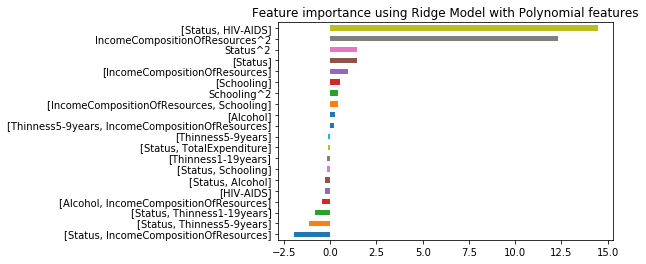

MSE :  12.837202992004771
Train Score: 0.8645411744187445
Test Score: 0.8575299858929567


In [324]:
#Polynomial Regression with Ridge Regularisation 
polyFeat_d2 = PolynomialFeatures(degree=2, include_bias=True)
polyFitTrainX = polyFeat_d2.fit_transform(x_train)
polyFitTestX = polyFeat_d2.fit_transform(x_test)

ridgeRegPoly = linear_model.Ridge(alpha=0.02726316, normalize=True)
ridgeRegPoly.fit(polyFitTrainX, y_train)
predYRidgePoly = ridgeRegPoly.predict(polyFitTestX)
ridgeMSEPoly = mean_squared_error(y_test, predYRidgePoly)
print(x_train.shape, polyFitTrainX.shape, len(polyFeat_d2.get_feature_names()))

coef = pd.Series(np.squeeze(ridgeRegPoly.coef_))
imp_coef = coef.sort_values()
imp_coef = pd.concat((imp_coef[:10,], imp_coef[-10:])) # select top 10 and bottom 10 feature coef

# create a dictionary to map polynomial features to input features 
input_feature_dict = dict(zip(['x'+str(i) for i in range(x_train.shape[1])], x.columns))
input_feature_dict['^2'] = '^2'

selected_features =  pd.Series(np.array(polyFeat_d2.get_feature_names())[imp_coef.index]) # get polynomial feature names 

# Map polynomial features names to input feature names by string matching
selected_features = selected_features.apply(lambda i: [i.split('^2')[0], '^2'] if '^' in i else i)
selected_features =  selected_features.apply(lambda i: i.split() if not isinstance(i, list) else i)
selected_features =  selected_features.apply(lambda i: [input_feature_dict[j] for j in i])
selected_features =  selected_features.apply(lambda i: ''.join(i) if '^2' in i else i)

# Assign features names to index 
imp_coef.index = selected_features.values

f=plt.figure()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model with Polynomial features")
plt.show()
f.savefig("Ridge.png", bbox_inches='tight', dpi=600)

print("MSE : ", ridgeMSEPoly)
print("Train Score:",ridgeRegPoly.score(polyFitTrainX,y_train))
print("Test Score:",ridgeRegPoly.score(polyFitTestX,y_test))



### Polynomial Features with Lasso Regression

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no reg

17.966481371907445

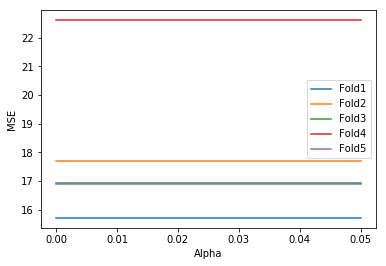

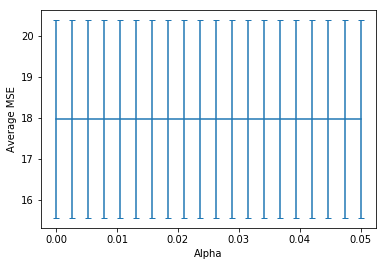

In [325]:
#Lasso in corrs-validation yields to a value almost 0 , from the sklearn documentation 
# if alpha value is 0 then it is nothing but the model is equivalent to OLS which we did earlier
#in this notebook under linear regression 
polyFeat_d2 = PolynomialFeatures(degree=2, include_bias=True)

from sklearn import model_selection
number_splits = 5
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True,random_state=999)

lRegPara = np.linspace(0,0.05,num=20)
# lRegPara =  [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
f4=plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(x):
    # Get the training and validation data
    x_train = np.array(x.loc[trainIndex])
    y_train = np.array(y.loc[trainIndex])
    x_valid = np.array(x.loc[validIndex])
    y_valid = np.array(y.loc[validIndex])
    # This is where you're polynomial model is used!
    polyFitTrainX = polyFeat_d2.fit_transform(x_train)
    polyFitValidX = polyFeat_d2.fit_transform(x_valid)
    for j , regPara in enumerate(lRegPara):
        polyLassoReg = linear_model.Lasso(alpha=regPara, normalize=True)
        polyLassoReg.fit(polyFitTrainX, y_train)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(y_valid, predY)
        lResults[nsplit, j] = (mse)
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold'+str(nsplit+1))
    nsplit = nsplit + 1

plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

f3=plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")
f3.savefig("l1.png", bbox_inches='tight', dpi=600)
f4.savefig("l2.png", bbox_inches='tight', dpi=600)

lResults.min()
np.mean(lResults,axis=0).min()


## Evaluation Metrics

Mean Squared Error is one of the best ways to compare the different regression models. MSE
measures the average of squared errors of the prediction to actual values. This measure helps to
distinguish between the models developed and interpreting the model sensitivity to extreme
values which may include unexpected values or the outliers.

R Squared value or the coefficient of determination measures the goodness of the fit. From its
empirical form, the percentage of variance explained by the model. In this study, the
performance of the model is calculated both on the training and testing data by R Squared value. 

## Model Selection

Ridge model with polynomial features of degree 2 is
considered as the best model. MSE score is considerably low but it will not explicitly tells the model 
performance because as discussed above ,it is a squared error value of the prections. Thus, as
second measure ,  R value is compared for the both train and test. From these metrics , Ridge 
model is able to explain nearly 88% of the variation in both train and test dataset

## Conclusion

This study evidence how the penalty terms to a loss function will manage the feature space and
improve the model performance.From all the experiments of different models in this study
describes how the developed hypothesis is dependent on the features . From the linear models
, target variable is defined by ‘Status’, ‘IncomeCompostionOfResources’, ‘Schooling’,
‘Alcohol’ features.This is also evident by the Ridge Regression, as ‘Status and
HIV’, ‘‘IncomeCompostionOfResources’’ , ‘Schooling’ variables are considered as important
features. 